# **Balancing**

## **Query data dari database**

In [1]:
!pip install pandas psycopg2-binary mysql-connector-python
!pip install -q pandas matplotlib seaborn sqlalchemy psycopg2 scikit-learn imbalanced-learn

In [2]:
import pandas as pd
import psycopg2
import mysql.connector
import os

try:
    # --- Langkah 1: Hubungkan ke Database dan Muat Data ---
    print("Menghubungkan ke database Anda...")

    # Koneksi ke PostgreSQL (sepal data)
    conn_pg = psycopg2.connect(
        host="pg-21171808-postgresql21-170.c.aivencloud.com",
        database="defaultdb",
        user="avnadmin",
        password="AVNS_emxcRXd6pI6F-9XSrNU",
        port="13844"
    )
    data_sepal = pd.read_sql("SELECT * FROM sepal", conn_pg)
    conn_pg.close()
    print(f"✅ Berhasil memuat {len(data_sepal)} baris dari PostgreSQL.")

    # Koneksi ke MySQL (petal data)
    conn_mysql = mysql.connector.connect(
        host="mysql-2b4a76d5-mysql21-170.c.aivencloud.com",
        database="defaultdb",
        user="avnadmin",
        password="AVNS_0XEo8Lr33wvHuOHjVZq",
        port="14185"
    )
    data_petal = pd.read_sql("SELECT * FROM petal", conn_mysql)
    conn_mysql.close()
    print(f"✅ Berhasil memuat {len(data_petal)} baris dari MySQL.")

    # --- Langkah 2: Menggabungkan Dua DataFrame ---
    print("\nMenggabungkan data sepal dan petal...")

    # PERBAIKAN DI SINI: Menggabungkan hanya berdasarkan 'id'
    iris_gabungan = pd.merge(data_sepal, data_petal, on='id')

    print(f"Data berhasil digabungkan. Total baris: {len(iris_gabungan)}")

    # --- Langkah 3: Menghapus 35 Data Iris-setosa ---
    print("\nMenghapus 35 baris data Iris-setosa...")
    indeks_setosa = iris_gabungan[iris_gabungan['class'] == 'Iris-setosa'].index
    indeks_untuk_dihapus = indeks_setosa[:35]
    iris_final = iris_gabungan.drop(indeks_untuk_dihapus)
    print("Proses penghapusan selesai.")

    # --- Langkah 4: Verifikasi Hasil ---
    print("\n--- Verifikasi Hasil ---")
    jumlah_setosa_awal = len(iris_gabungan[iris_gabungan['class'] == 'Iris-setosa'])
    jumlah_setosa_akhir = len(iris_final[iris_final['class'] == 'Iris-setosa'])
    print(f"Jumlah total data sebelum dihapus: {len(iris_gabungan)} baris")
    print(f"Jumlah 'Iris-setosa' sebelum dihapus: {jumlah_setosa_awal} baris")
    print("-" * 25)
    print(f"Jumlah 'Iris-setosa' setelah dihapus: {jumlah_setosa_akhir} baris")
    print(f"Jumlah total data setelah dihapus: {len(iris_final)} baris")

    # --- Langkah 5: Simpan Hasil ke File CSV ---
    nama_file = "iris_final_from_db.csv"
    iris_final.to_csv(nama_file, index=False)
    print(f"\n✅ Data final telah disimpan ke file '{nama_file}'.")

except Exception as e:
    print(f"\n❌ Terjadi kesalahan: {e}")

Menghubungkan ke database Anda...


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12648\3639765566.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_sepal = pd.read_sql("SELECT * FROM sepal", conn_pg)


✅ Berhasil memuat 150 baris dari PostgreSQL.
✅ Berhasil memuat 150 baris dari MySQL.

Menggabungkan data sepal dan petal...
Data berhasil digabungkan. Total baris: 150

Menghapus 35 baris data Iris-setosa...
Proses penghapusan selesai.

--- Verifikasi Hasil ---
Jumlah total data sebelum dihapus: 150 baris
Jumlah 'Iris-setosa' sebelum dihapus: 50 baris
-------------------------
Jumlah 'Iris-setosa' setelah dihapus: 15 baris
Jumlah total data setelah dihapus: 115 baris

✅ Data final telah disimpan ke file 'iris_final_from_db.csv'.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12648\3639765566.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_petal = pd.read_sql("SELECT * FROM petal", conn_mysql)


## **Visualisasi Dataset**

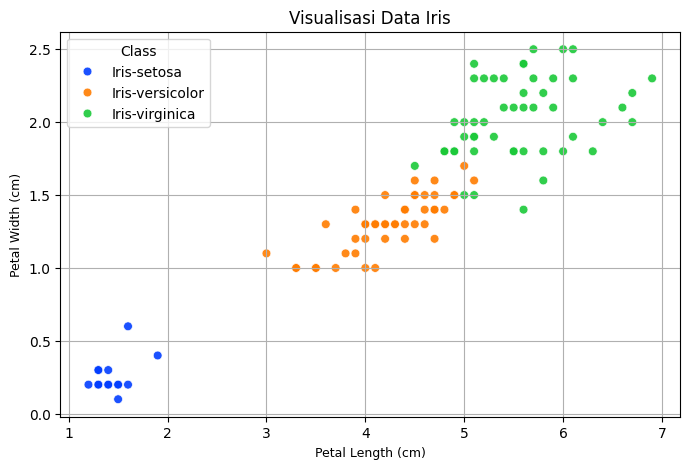

115


<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=iris_final,
    x="petal_length",
    y="petal_width",
    hue="class",
    palette="bright",
    markers="o",
    s=40,
    alpha=0.9
)
plt.title("Visualisasi Data Iris", fontsize=12)
plt.xlabel("Petal Length (cm)", fontsize=9)
plt.ylabel("Petal Width (cm)", fontsize=9)
plt.legend(title="Class")
plt.grid(True)
plt.show()
plt.clf()
print(len(iris_final))

## **Reduksi Dimensi menggunakan PCA**


Data berhasil di-scaling.
PCA berhasil diterapkan.

Varians yang dijelaskan oleh Komponen Utama 1: 67.40%
Varians yang dijelaskan oleh Komponen Utama 2: 25.99%
Total varians yang dijelaskan oleh 2 komponen: 93.39%

Pratinjau DataFrame hasil PCA:
        PC1       PC2        class
0 -3.342629  0.956326  Iris-setosa
1 -2.912710  1.849874  Iris-setosa
2 -3.388272  0.651115  Iris-setosa
3 -3.751197  0.289592  Iris-setosa
4 -3.125458  1.481450  Iris-setosa


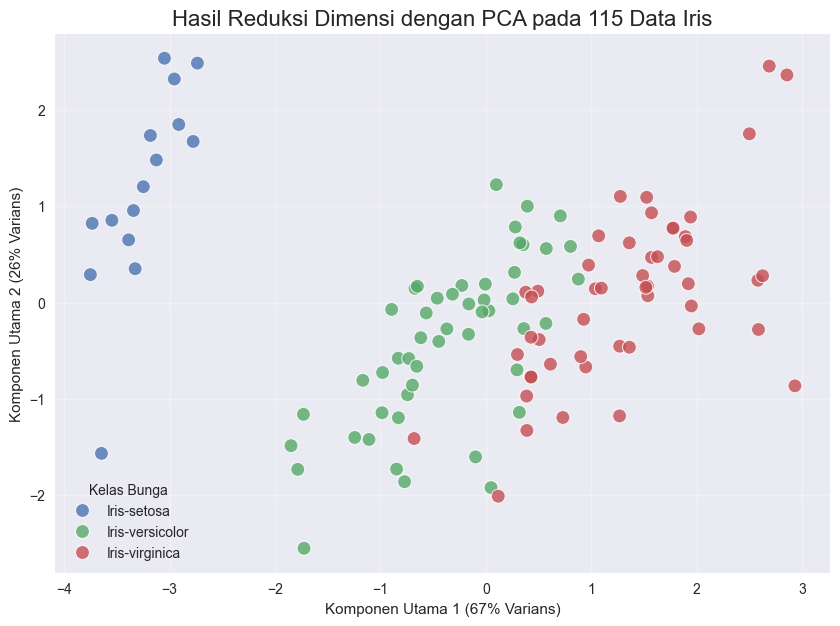

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- Langkah 1: Persiapan dan Scaling Data ---
# Pastikan DataFrame 'iris_final' sudah ada dan berisi 115 data Anda.

# Pisahkan fitur numerik yang akan direduksi
numeric_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_final[numeric_features]
y_class = iris_final['class']

# PCA sensitif terhadap skala, jadi kita perlu menstandarkan data terlebih dahulu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data berhasil di-scaling.")

# --- Langkah 2: Menerapkan PCA ---
# Kita akan mereduksi 4 fitur menjadi 2 Komponen Utama (Principal Components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("PCA berhasil diterapkan.")

# --- Langkah 3: Menganalisis Hasil ---
# Lihat seberapa banyak informasi (varians) yang ditangkap oleh 2 komponen baru
explained_variance = pca.explained_variance_ratio_
print(f"\nVarians yang dijelaskan oleh Komponen Utama 1: {explained_variance[0]:.2%}")
print(f"Varians yang dijelaskan oleh Komponen Utama 2: {explained_variance[1]:.2%}")
print(f"Total varians yang dijelaskan oleh 2 komponen: {sum(explained_variance):.2%}")

# Buat DataFrame baru dari hasil PCA untuk kemudahan analisis dan visualisasi
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, y_class.reset_index(drop=True)], axis=1)

print("\nPratinjau DataFrame hasil PCA:")
print(pca_df.head())


# --- Langkah 4: Visualisasi Hasil PCA ---
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 7))

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='class', s=100, alpha=0.8)

plt.title('Hasil Reduksi Dimensi dengan PCA pada 115 Data Iris', fontsize=16)
plt.xlabel(f'Komponen Utama 1 ({explained_variance[0]:.0%} Varians)')
plt.ylabel(f'Komponen Utama 2 ({explained_variance[1]:.0%} Varians)')
plt.legend(title='Kelas Bunga')
plt.grid(True, alpha=0.3)
plt.show()

## **Visualisasi Dataset PCA dan LDA**

Persentase varians yang dijelaskan oleh PCA (dua komponen pertama): [0.8962252 0.0647599]


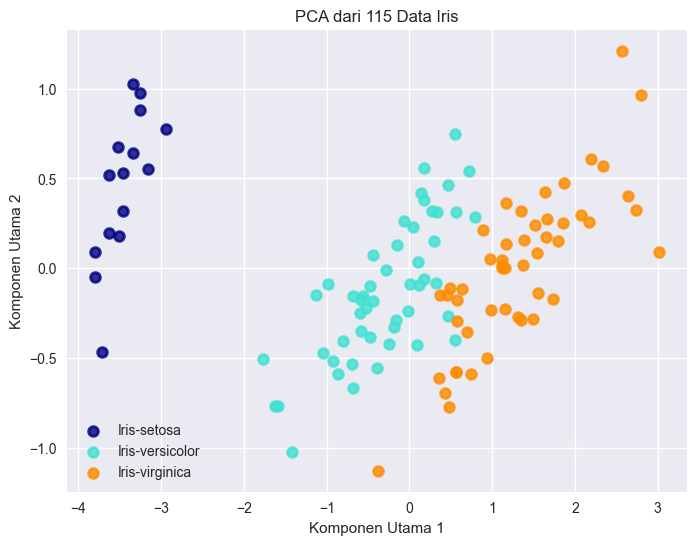

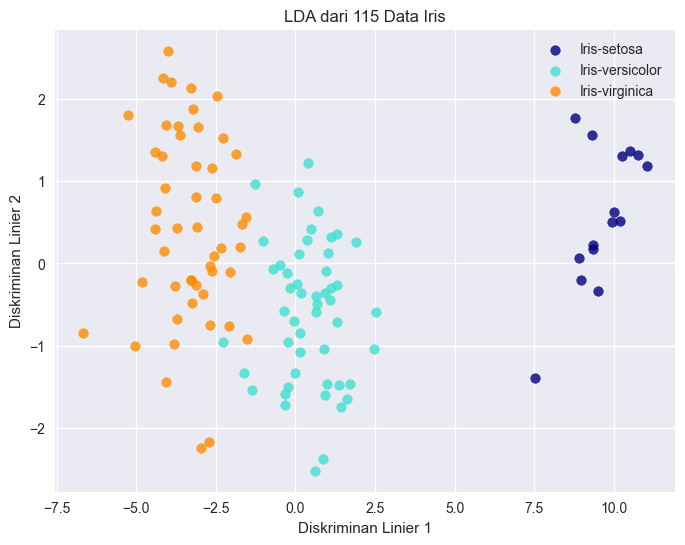

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# --- Langkah 1: Persiapan Data dari DataFrame 'iris_final' Anda ---
# Pastikan DataFrame 'iris_final' sudah ada dari skrip sebelumnya

# A. Pisahkan fitur (X) dan target (y)
numeric_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_final[numeric_features].values
y_text = iris_final['class']

# B. Ubah target dari teks menjadi angka (0, 1, 2) karena LDA memerlukannya
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
target_map = {name: i for i, name in enumerate(target_names)}
y = y_text.map(target_map).values


# --- Langkah 2: Terapkan PCA pada 115 Data ---
pca = PCA(n_components=2)
# PCA hanya memerlukan fitur (X)
X_r = pca.fit(X).transform(X)


# --- Langkah 3: Terapkan LDA pada 115 Data ---
lda = LinearDiscriminantAnalysis(n_components=2)
# LDA memerlukan fitur (X) dan target (y) untuk menemukan pemisahan terbaik
X_r2 = lda.fit(X, y).transform(X)

# Cetak persentase varians yang dijelaskan oleh PCA
print(
    "Persentase varians yang dijelaskan oleh PCA (dua komponen pertama): %s"
    % str(pca.explained_variance_ratio_)
)


# --- Langkah 4: Visualisasi Hasil ---
plt.style.use('seaborn-v0_8')
colors = ["navy", "turquoise", "darkorange"]
lw = 2

# Plot untuk PCA
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA dari 115 Data Iris")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")

# Plot untuk LDA
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA dari 115 Data Iris")
plt.xlabel("Diskriminan Linier 1")
plt.ylabel("Diskriminan Linier 2")

plt.show()

## **Balancing Menggunakan SMOTE**

In [6]:
!pip install imbalanced-learn

In [7]:
import numpy as np
from collections import Counter
# SMOTE
from imblearn.over_sampling import SMOTE

# --- Persiapan ---
# Pastikan variabel X (fitur) dan y (target numerik) sudah ada
# dari skrip analisis PCA/LDA sebelumnya.

# 1. Tampilkan distribusi kelas SEBELUM balancing
print("Distribusi Kelas Sebelum Balancing:")
print(Counter(y))

# 2. Inisialisasi dan terapkan SMOTE
# SMOTE akan membuat sampel baru untuk kelas minoritas (kelas 0: Iris-setosa)
# menggunkan smote
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. Tampilkan distribusi kelas SETELAH balancing
print("\nDistribusi Kelas Setelah Balancing dengan SMOTE:")
print(Counter(y_resampled))

# 4. Tampilkan perbandingan ukuran dataset
print(f"\nUkuran dataset asli: {X.shape}")
print(f"Ukuran dataset setelah di-resample: {X_resampled.shape}")

Distribusi Kelas Sebelum Balancing:
Counter({np.int64(1): 50, np.int64(2): 50, np.int64(0): 15})

Distribusi Kelas Setelah Balancing dengan SMOTE:
Counter({np.int64(0): 50, np.int64(1): 50, np.int64(2): 50})

Ukuran dataset asli: (115, 4)
Ukuran dataset setelah di-resample: (150, 4)


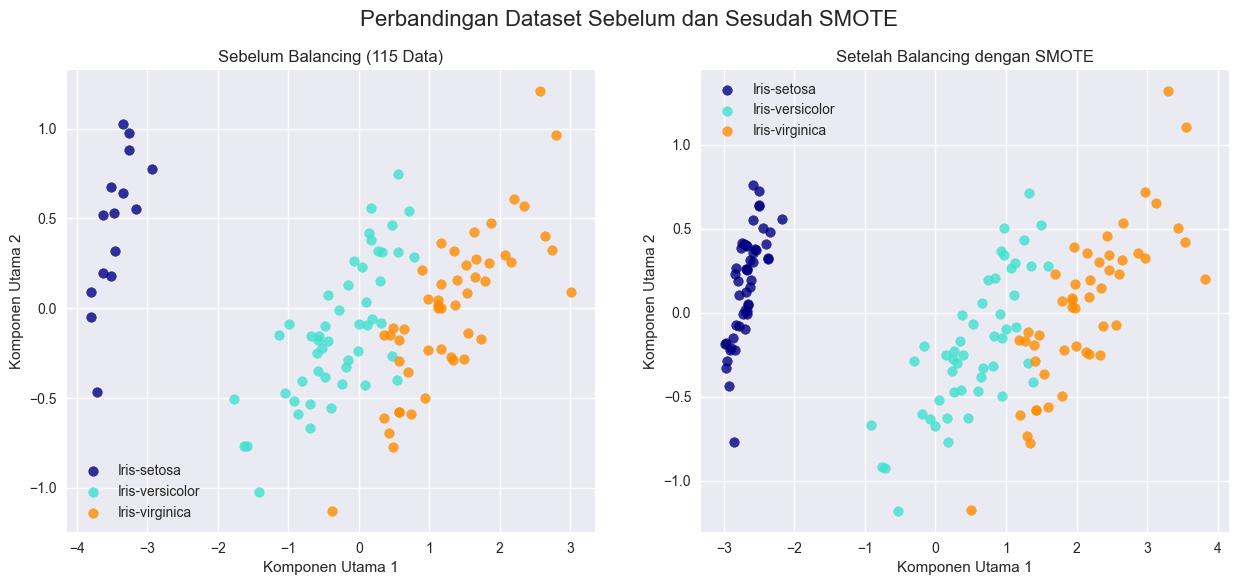

In [8]:
import matplotlib.pyplot as plt

# --- Visualisasi Data SEBELUM Balancing (menggunakan hasil PCA sebelumnya) ---
plt.figure(figsize=(15, 6))
plt.suptitle('Perbandingan Dataset Sebelum dan Sesudah SMOTE', fontsize=16)

# Plot 1: Sebelum Smote
plt.subplot(1, 2, 1)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, label=target_name)
plt.title('Sebelum Balancing (115 Data)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend()

# --- Visualisasi Data SETELAH Balancing ---
# Kita perlu menjalankan PCA pada data yang sudah di-resample untuk bisa memplotnya
pca_resampled = PCA(n_components=2)
X_r_resampled = pca_resampled.fit(X_resampled).transform(X_resampled)

# Plot 2: Setelah smote
plt.subplot(1, 2, 2)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r_resampled[y_resampled == i, 0], X_r_resampled[y_resampled == i, 1],
                color=color, alpha=0.8, label=target_name)
plt.title('Setelah Balancing dengan SMOTE')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend()

plt.show()

In [9]:

# --- Langkah 1: Membagi Data Menjadi Latih dan Uji ---
# Kita menggunakan data X (fitur) dan y (target numerik) dari 115 data Anda.
# Data dibagi menjadi 70% untuk training dan 30% untuk testing.
# 'stratify=y' memastikan proporsi kelas di data latih dan uji sama dengan data asli.

print("Membagi dataset menjadi data latih dan data uji...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Ukuran data latih (X_train): {X_train.shape}")
print(f"Ukuran data uji (X_test): {X_test.shape}")


# --- Langkah 2: Menampilkan Distribusi Kelas SEBELUM SMOTE ---
# Kita periksa jumlah sampel per kelas hanya pada data latih (y_train).
print("\n" + "="*40)
print("Distribusi Kelas pada Data Latih SEBELUM SMOTE:")
# Menggunakan target_names dari skrip PCA/LDA untuk nama kelas yang mudah dibaca
distribusi_sebelum = {target_names[i]: count for i, count in sorted(Counter(y_train).items())}
print(distribusi_sebelum)


# --- Langkah 3: Menerapkan SMOTE pada Data Latih ---
# SMOTE hanya diterapkan pada data latih untuk mencegah data leakage.
print("\nMenerapkan SMOTE pada data latih...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# --- Langkah 4: Menampilkan Distribusi Kelas SETELAH SMOTE ---
print("\n" + "="*40)
print("Distribusi Kelas pada Data Latih SETELAH SMOTE:")
distribusi_setelah = {target_names[i]: count for i, count in sorted(Counter(y_train_smote).items())}
print(distribusi_setelah)
print(f"Ukuran data latih setelah SMOTE: {X_train_smote.shape}")

Membagi dataset menjadi data latih dan data uji...


NameError: name 'train_test_split' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# --- Langkah 1: Membuat dan Melatih Model KNN ---
# Membuat instance model KNN, kita coba dengan 5 tetangga (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Melatih model menggunakan data training yang sudah di-oversampling dengan SMOTE
print("Melatih model KNN...")
knn_model.fit(X_train_smote, y_train_smote)
print("Model berhasil dilatih.")


# --- Langkah 2: Melakukan Prediksi pada Data Uji ---
# Model yang sudah dilatih digunakan untuk memprediksi kelas dari data uji (X_test)
print("\nMelakukan prediksi pada data uji...")
y_pred_knn = knn_model.predict(X_test)


# --- Langkah 3: Mengevaluasi Performa Model ---
# Kita bandingkan hasil prediksi (y_pred_knn) dengan label yang sebenarnya (y_test)
print("Mengevaluasi performa model...")
accuracy_knn = accuracy_score(y_test, y_pred_knn)
# Menggunakan 'target_names' agar laporan lebih mudah dibaca
report_knn = classification_report(y_test, y_pred_knn, target_names=target_names)

print("\n" + "="*45)
print("     HASIL EVALUASI MODEL K-NEAREST NEIGHBORS     ")
print("="*45)
print(f"\nAkurasi Model KNN: {accuracy_knn:.4f} ({accuracy_knn:.2%})")
print("\nLaporan Klasifikasi KNN:")
print(report_knn)

Melatih model KNN...
Model berhasil dilatih.

Melakukan prediksi pada data uji...
Mengevaluasi performa model...

     HASIL EVALUASI MODEL K-NEAREST NEIGHBORS     

Akurasi Model KNN: 0.9714 (97.14%)

Laporan Klasifikasi KNN:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.97        35
      macro avg       0.98      0.98      0.98        35
   weighted avg       0.97      0.97      0.97        35



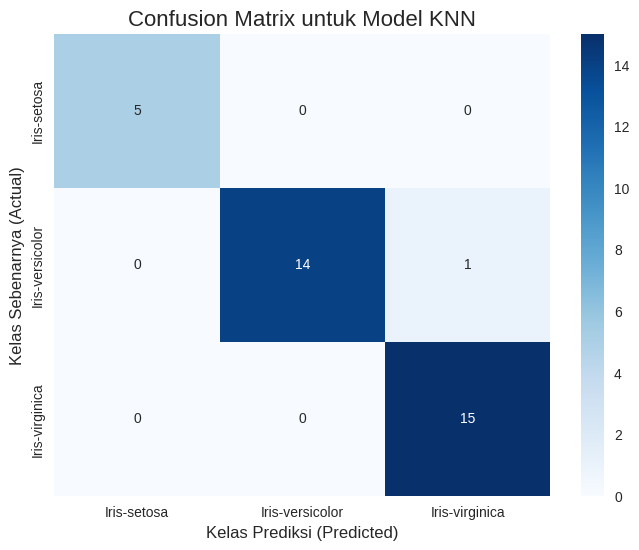

In [ ]:
# Langkah 1: Impor library yang diperlukan
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Pastikan variabel y_test, y_pred_knn, dan target_names sudah ada ---

# Langkah 2: Menghitung confusion matrix dari hasil prediksi KNN
# Membandingkan label asli (y_test) dengan label prediksi (y_pred_knn)
cm = confusion_matrix(y_test, y_pred_knn)

# Langkah 3: Membuat heatmap untuk visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)

plt.title('Confusion Matrix untuk Model KNN', fontsize=16)
plt.ylabel('Kelas Sebenarnya (Actual)', fontsize=12)
plt.xlabel('Kelas Prediksi (Predicted)', fontsize=12)
plt.show()